In [1]:
import matplotlib.pyplot as plt
import numpy as np

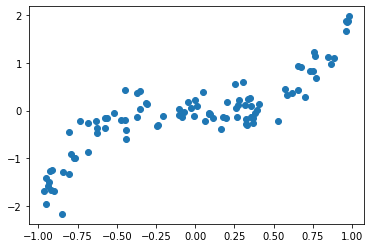

In [107]:
m = 100
x = -1+2*np.random.rand(m)
y = 2*x**3+0.25*np.random.randn(m)#**3
plt.scatter(x,y)

In [108]:
X = np.ones((m,2))
X[:,1]=x

In [109]:
K = (X.dot(X.T))**3
alpha = np.linalg.lstsq(K,y,rcond=None)[0]

In [110]:
X.T.dot(alpha)

array([ 0.00657366, -0.0725954 ])

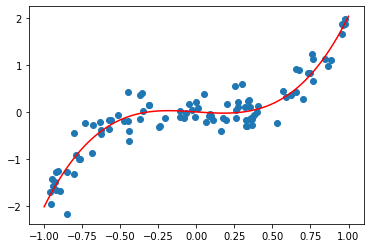

In [111]:
# plot results
m_plot = 100
x_plot = np.linspace(-1,1,m_plot)
X_plot = np.ones((m_plot,2))
X_plot[:,1]=x_plot
K_plot = (X_plot.dot(X.T))**3
y_plot = K_plot.dot(alpha)

plt.scatter(x,y)
plt.plot(x_plot,y_plot,'r')

## Gaussian Kernel

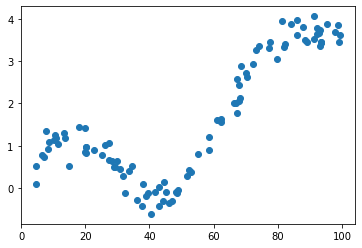

In [199]:
m = 100
x = 100*np.random.rand(m)
y = np.sin(x/10) + (x/50)**2 + 0.25*np.random.randn(m)
x=x
plt.scatter(x,y)

In [200]:
from sklearn.metrics import pairwise_distances
d = pairwise_distances(x.reshape(m,1))

In [235]:
sigma = 100
K = np.exp(-d**2/(2*sigma**2))
alpha = np.linalg.lstsq(K,y,rcond=None)[0]

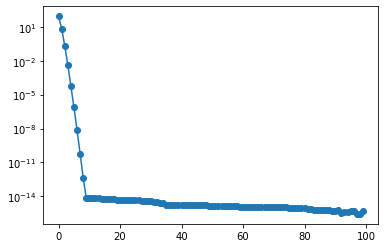

In [236]:
plt.semilogy(np.abs(np.linalg.eig(K)[0]),'o-')

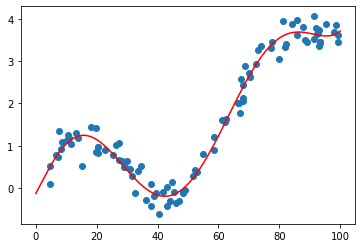

In [237]:
m_plot = 200
x_plot = np.linspace(0,100,m_plot)
d_plot = pairwise_distances(x_plot.reshape(m_plot,1),x.reshape(m,1))
K_plot = np.exp(-d_plot**2/(2*sigma**2))
y_plot = K_plot.dot(alpha)

plt.scatter(x,y)
plt.plot(x_plot,y_plot,'r')
#plt.ylim([-1,5])